# Question 

![WhatsApp Image 2024-08-07 at 15.34.47_4eda2aca.jpg](<attachment:WhatsApp Image 2024-08-07 at 15.34.47_4eda2aca.jpg>)
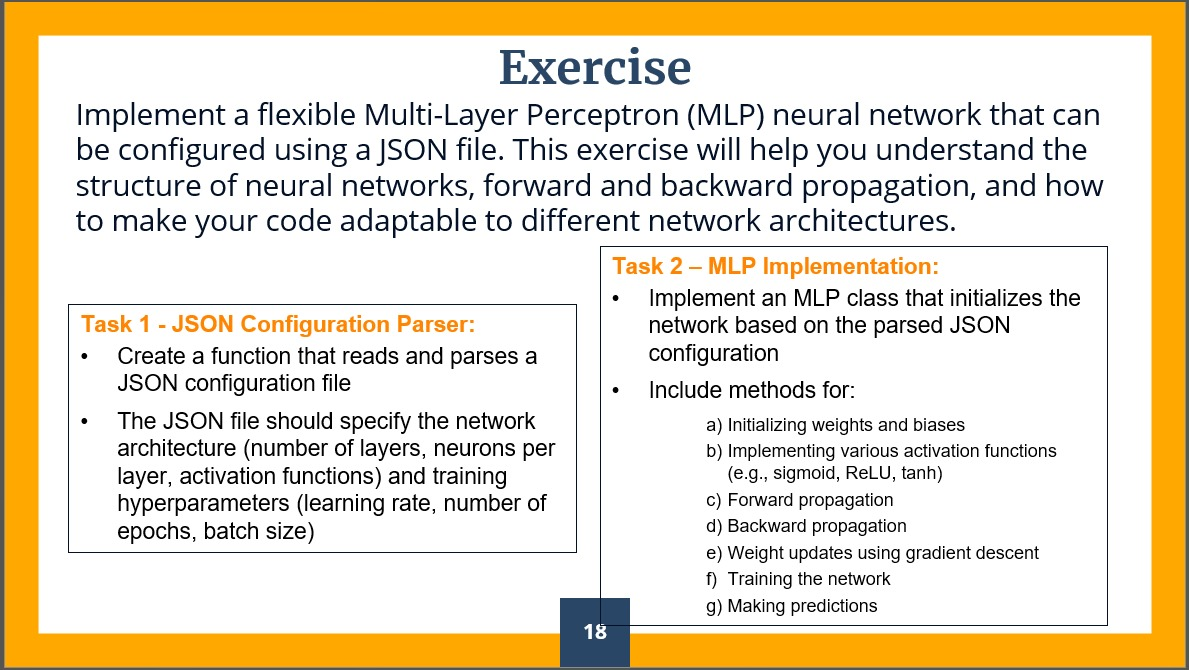

In [21]:
import json
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the configuration
with open('MLP.json', 'r') as f:
    config = json.load(f)

layers = config['layers']
learning_rate = config['learning_rate']
epochs = config['epochs']
batch_size = config['batch_size']

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def softmax_derivative(x):
    return softmax(x) * (1 - softmax(x))

# Define the Layer class
class Layer:
    def __init__(self, input_size, output_size, activation=None):
        self.input_size = input_size
        self.output_size = output_size
        self.activation = activation
        self.weights = np.random.randn(input_size, output_size) * 0.01
        self.biases = np.zeros((1, output_size))
        self.input = None
        self.output = None

    def forward(self, X):
        self.input = X
        self.output = np.dot(X, self.weights) + self.biases
        if self.activation == 'sigmoid':
            self.output = sigmoid(self.output)
        elif self.activation == 'softmax':
            self.output = softmax(self.output)
        return self.output

    def backward(self, error):
        if self.activation == 'sigmoid':
            error *= sigmoid_derivative(self.output)
        elif self.activation == 'softmax':
            error *= softmax_derivative(self.output)
        self.dweights = np.dot(self.input.T, error)
        self.dbiases = np.sum(error, axis=0, keepdims=True)
        return np.dot(error, self.weights.T)

    def update_weights(self, learning_rate):
        self.weights += learning_rate * self.dweights
        self.biases += learning_rate * self.dbiases

# Define the NeuralNetwork class
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = []
        for i in range(len(layers) - 1):
            input_size = layers[i]['neurons']
            output_size = layers[i+1]['neurons']
            activation = layers[i+1].get('activation', None)
            self.layers.append(Layer(input_size, output_size, activation))

    def forward_propagation(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward_propagation(self, X, y, output):
        error = y - output
        for layer in reversed(self.layers):
            error = layer.backward(error)

    def update_weights(self, learning_rate):
        for layer in self.layers:
            layer.update_weights(learning_rate)

    def train(self, X, y, epochs, batch_size, learning_rate):
        for _ in range(epochs):
            for i in range(0, len(X), batch_size):
                batch_X = X[i:i+batch_size]
                batch_y = y[i:i+batch_size]
                
                output = self.forward_propagation(batch_X)
                self.backward_propagation(batch_X, batch_y, output)
                self.update_weights(learning_rate)
                
    def predict(self, X):
        return self.forward_propagation(X)

# Initialize and train the neural network
network = NeuralNetwork(layers)

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert labels to one-hot encoding
y = np.eye(len(np.unique(y)))[y]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Iris dataset loaded:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Train the network
network.train(X_train, y_train, epochs, batch_size, learning_rate)

# Make predictions
predictions = network.predict(X_test)

print("Predictions made on the test set:")
print(predictions)


Iris dataset loaded:
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120, 3)
y_test shape: (30, 3)
Predictions made on the test set:
[[4.81647954e-03 9.99927432e-01 1.67382201e-05]
 [9.94875372e-01 1.04830955e-02 1.68721932e-07]
 [6.19489996e-05 1.71253855e-02 9.88985156e-01]
 [1.73035197e-03 9.99749594e-01 6.60208086e-05]
 [9.28173895e-03 9.99880811e-01 3.19651654e-05]
 [9.94850092e-01 1.05657574e-02 1.68868722e-07]
 [7.69443307e-03 9.99991659e-01 1.00810376e-06]
 [8.08588306e-05 2.91005445e-02 9.79899647e-01]
 [2.28292893e-03 9.73077774e-01 1.47411990e-02]
 [6.92775606e-03 9.99992951e-01 1.03250796e-06]
 [8.55305751e-05 5.65801650e-02 9.56932776e-01]
 [9.94810769e-01 1.06948041e-02 1.69095877e-07]
 [9.94890027e-01 1.04352849e-02 1.68636565e-07]
 [9.94805498e-01 1.07121476e-02 1.69126222e-07]
 [9.94882595e-01 1.04595212e-02 1.68679882e-07]
 [4.73045244e-04 9.98002755e-01 6.88563878e-04]
 [6.19473134e-05 1.71236318e-02 9.88986226e-01]
 [6.86303298e-03 9.99992608e-01 1.125